# QARM II : Project - Portfolio optimal rebalancing 


---



### **Table of content:**

0 - Environment 
* Librairies importation 
* Dark mode matplotlib (optional: depends on your IDE background theme)

I - Data Cleaning and Exploration
* Data importation and data cleaning for LPP-40 2000/2005/2015
* Data exploration

II - Rebalancing methods class 
* Creation of a rebalancing methods and visualization class 

III - Results 
* Results function 
* LPP-40 (2000)
* LPP-40 (2005)
* LPP-40 (2015)
* Results visualisation 

IV - Sensitivity analysis

V - Robustness Check
* Robstness results function 
* LPP-25 (2015)
* LPP-60 (2015)
* Robustness visualisation

VI - GUI directory




### **Data:**
* All the data used in this project is available in excel file in appendix. It contains all constituents of LPP indices used in the project on a monthly basis (end of the months data to reproduce LPP indices original rebalancing). In this project the nomenclature of the components was simplified by defining them by their class of assets (bonds, stocks and others) and regions(Swiss, US, Euro). The data was extract using Datastream.



---



#### **Célia Benaouda - Florent Fischer** 


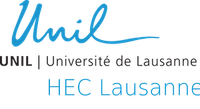



# Environement  

In [ ]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Matplotlib darkmode 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler

# Paramters change
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Data Cleaning and Exploration 



### Data Importation and Data Cleaning: LPP 2000, LPP 2005, LPP 2015

In [ ]:
# Data importation and preparation 

# Database loading 
lpp2000 = pd.read_excel("LPP2000.xlsx",sheet_name='LPP2000', index_col="Date", parse_dates=True)
lpp2005 = pd.read_excel("LPP2000.xlsx",sheet_name='LPP2005', index_col="Date", parse_dates=True)
lpp2015 = pd.read_excel("LPP2000.xlsx",sheet_name='LPP2015', index_col="Date", parse_dates=True)


# Change dataframe columns names 
lpp2000.columns = ["Swiss Bond", "Swiss Stocks", "Mondial Stocks", "Euro Bonds", "Mondial Bonds"]
lpp2005.columns = ["Swiss Bond", "Mondial Bonds", "Swiss Stocks", "Mondial Stocks","Swiss Real Estate (Other)","World Real Estate (Other)","Hedge funde (Other)","Private Equity (Other)"]
lpp2015.columns = ["Swiss Bond","Dev. Countries Bond","Emerg. Countries Bond","Corporate Bond", "Swiss Stocks", "Mondial Stocks", "Small Cap Stocks", "Real Estate (Other)","Hedge fund (Other)"]


# Define columns of differents assets 
columns_2000 = ["Swiss Bond", "Euro Bonds", "Mondial Bonds", "Swiss Stocks", "Mondial Stocks"]
columns_2005 = ["Swiss Bond", "Mondial Bonds", "Swiss Stocks", "Mondial Stocks","Swiss Real Estate (Other)","World Real Estate (Other)","Hedge funde (Other)","Private Equity (Other)"]
columns_2015 = ["Swiss Bond","Dev. Countries Bond","Emerg. Countries Bond","Corporate Bond", "Swiss Stocks", "Mondial Stocks", "Small Cap Stocks", "Real Estate (Other)","Hedge fund (Other)"]


# Create returns of all LPP
lpp2000 = pd.concat((lpp2000["Swiss Bond"], lpp2000["Euro Bonds"], lpp2000["Mondial Bonds"], lpp2000["Swiss Stocks"], lpp2000["Mondial Stocks"]), axis=1).pct_change(1)
lpp2005 = lpp2005.pct_change(1)
lpp2015 = lpp2015.pct_change(1)


# LPP40 weights given differents years 
weight_LPP_2000_40 = [0.45, 0.1, 0.05, 0.15, 0.25] 
weight_LPP_2005_40 = [0.3,0.2,0.1,0.2,0.05,0.05,0.05,0.05]
weight_LPP_2015_40 = [0.3,0.1,0.05,0.05,0.15,0.2,0.05,0.05,0.05]


# Benchmark computation
lpp40_2000 = np.multiply(lpp2000, weight_LPP_2000_40).sum(axis=1)
lpp40_2005 = np.multiply(lpp2005, weight_LPP_2005_40).sum(axis=1)
lpp40_2015 = np.multiply(lpp2015, weight_LPP_2015_40).sum(axis=1)


#Adding the benchmark on the dataframe
lpp2000["LPP 40"] = lpp40_2000
lpp2005["LPP 40"] = lpp40_2005
lpp2015["LPP 40"] = lpp40_2015


# Drop missing values 
lpp2000 = lpp2000.dropna()
lpp2005 = lpp2005.dropna()
lpp2015 = lpp2015.dropna()


# LPP-25 2015 dataframe (Robustness check)
weight_LPP_2015_25 = [0.45,0.1,0.05,0.05,0.1,0.15,0.0,0.05,0.05]
lpp25_2015 = np.multiply(lpp2015[columns_2015], weight_LPP_2015_25).sum(axis=1)
lpp2015["LPP 25"] = lpp25_2015
lpp2015 = lpp2015.dropna()


# LPP-60 2015 dataframe (Robustness check)
weight_LPP_2015_60 = [0.1,0.1,0.05,0.05,0.20,0.30,0.10,0.05,0.05]
lpp60_2015 = np.multiply(lpp2015[columns_2015], weight_LPP_2015_60).sum(axis=1)
lpp2015["LPP 60"] = lpp60_2015
lpp2015 = lpp2015.dropna()


## Data Exploration

In [ ]:
def describe(lpp,columns):
  """
  Documentation
  """

  # Usual description
  resume = np.transpose([[1,12,np.sqrt(12),1,1,1,1,1]])*lpp.describe()

  # Non usual description
  sharpe = (lpp.mean(axis=0) / lpp.std(axis=0))*np.sqrt(12)
  sharpe = pd.DataFrame(sharpe, index=lpp.columns, columns = ["sharpe"]).transpose()

  # Concat the descriptions
  description = pd.concat((resume, sharpe), axis=0)

  # Display results
  display(description)
  display(lpp.iloc[:,:len(columns)].corr())

  
  # Download excel dataframe
  #description.to_excel('/content/lpp2015_description.xlsx')
  #lpp.iloc[:,:len(columns)].corr().to_excel('/content/lpp2015_correlation.xlsx')

In [ ]:
# LPP 2000 description
describe(lpp2000,columns_2000)

,Swiss Bond,Euro Bonds,Mondial Bonds,Swiss Stocks,Mondial Stocks,LPP 40
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.023122,0.038388,0.035091,0.060944,0.084036,0.046149
std,0.032049,0.035107,0.053994,0.128444,0.163695,0.061478
min,-0.051236,-0.033915,-0.039732,-0.101880,-0.197906,-0.071867
25%,-0.002580,-0.004373,-0.007201,-0.014898,-0.015369,-0.003415
50%,0.002227,0.004311,0.004131,0.009451,0.012900,0.005578
75%,0.007359,0.009574,0.012765,0.028617,0.031915,0.014253
max,0.041034,0.031557,0.062131,0.095817,0.123633,0.049821
sharpe,0.721449,1.093481,0.649901,0.474476,0.513368,0.750658


,Swiss Bond,Euro Bonds,Mondial Bonds,Swiss Stocks,Mondial Stocks
Swiss Bond,1.000000,0.776946,0.396211,0.043261,0.027237
Euro Bonds,0.776946,1.000000,0.443586,0.120883,0.039866
Mondial Bonds,0.396211,0.443586,1.000000,0.079584,0.402796
Swiss Stocks,0.043261,0.120883,0.079584,1.000000,0.765234
Mondial Stocks,0.027237,0.039866,0.402796,0.765234,1.000000


In [ ]:
# LPP 2005 description
describe(lpp2005,columns_2005)

,Swiss Bond,Mondial Bonds,Swiss Stocks,Mondial Stocks,Swiss Real Estate (Other),World Real Estate (Other),Hedge funde (Other),Private Equity (Other),LPP 40
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.023122,0.003706,0.060944,0.042744,0.064638,0.059354,-0.011113,0.096316,0.032781
std,0.032049,0.028010,0.128444,0.167548,0.072027,0.202932,0.057258,0.231227,0.068635
min,-0.051236,-0.022702,-0.101880,-0.194534,-0.068803,-0.293179,-0.099040,-0.264072,-0.094352
25%,-0.002580,-0.004787,-0.014898,-0.015948,-0.006237,-0.013872,-0.007859,-0.019172,-0.004438
50%,0.002227,0.000485,0.009451,0.009177,0.006446,0.008317,0.000784,0.017317,0.005218
75%,0.007359,0.006180,0.028617,0.030598,0.017674,0.033924,0.009144,0.041105,0.013917
max,0.041034,0.026650,0.095817,0.126944,0.060552,0.216356,0.029416,0.330178,0.060401
sharpe,0.721449,0.132306,0.474476,0.255118,0.897417,0.292482,-0.194085,0.416544,0.477608


,Swiss Bond,Mondial Bonds,Swiss Stocks,Mondial Stocks,Swiss Real Estate (Other),World Real Estate (Other),Hedge funde (Other),Private Equity (Other)
Swiss Bond,1.000000,0.790304,0.043261,0.047583,0.229698,0.223919,0.074966,0.126097
Mondial Bonds,0.790304,1.000000,0.082267,-0.010844,0.235300,0.327335,0.090816,0.085201
Swiss Stocks,0.043261,0.082267,1.000000,0.778559,0.306945,0.648745,0.628004,0.764984
Mondial Stocks,0.047583,-0.010844,0.778559,1.000000,0.296192,0.678533,0.682252,0.786770
Swiss Real Estate (Other),0.229698,0.235300,0.306945,0.296192,1.000000,0.372942,0.355927,0.336138
World Real Estate (Other),0.223919,0.327335,0.648745,0.678533,0.372942,1.000000,0.670224,0.810846
Hedge funde (Other),0.074966,0.090816,0.628004,0.682252,0.355927,0.670224,1.000000,0.731214
Private Equity (Other),0.126097,0.085201,0.764984,0.786770,0.336138,0.810846,0.731214,1.000000


In [ ]:
# LPP 2015 description
describe(lpp2015,columns_2015)

,Swiss Bond,Dev. Countries Bond,Emerg. Countries Bond,Corporate Bond,Swiss Stocks,Mondial Stocks,Small Cap Stocks,Real Estate (Other),Hedge fund (Other),LPP 40,LPP 25,LPP 60
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.026544,0.025759,0.034109,0.042528,0.079311,0.092122,0.113552,0.070638,-0.012594,0.053272,0.043004,0.066818
std,0.032778,0.031098,0.113522,0.041870,0.125572,0.166506,0.192468,0.073762,0.057118,0.068764,0.049078,0.097961
min,-0.051236,-0.022836,-0.121552,-0.068498,-0.101880,-0.197906,-0.226165,-0.068803,-0.099040,-0.084146,-0.062473,-0.116801
25%,-0.002239,-0.003698,-0.013727,-0.002339,-0.011859,-0.015685,-0.017076,-0.005317,-0.005664,-0.002995,-0.001827,-0.006147
50%,0.002603,0.001694,0.007001,0.004207,0.010890,0.013198,0.012331,0.007099,0.001188,0.006153,0.005028,0.008360
75%,0.007439,0.007517,0.022559,0.010300,0.028760,0.032152,0.037983,0.017788,0.007846,0.014298,0.011318,0.020460
max,0.041034,0.031144,0.084374,0.037322,0.095817,0.123633,0.165876,0.060552,0.029416,0.053560,0.038456,0.076090
sharpe,0.809820,0.828321,0.300463,1.015715,0.631602,0.553264,0.589980,0.957650,-0.220487,0.774710,0.876251,0.682093


,Swiss Bond,Dev. Countries Bond,Emerg. Countries Bond,Corporate Bond,Swiss Stocks,Mondial Stocks,Small Cap Stocks,Real Estate (Other),Hedge fund (Other)
Swiss Bond,1.000000,0.709192,0.190260,0.666484,0.057752,0.039452,0.059935,0.253233,0.116771
Dev. Countries Bond,0.709192,1.000000,0.117597,0.360994,-0.116607,-0.200545,-0.240958,0.116658,-0.219970
Emerg. Countries Bond,0.190260,0.117597,1.000000,0.524880,0.422431,0.751669,0.689199,0.301415,0.561479
Corporate Bond,0.666484,0.360994,0.524880,1.000000,0.455146,0.528092,0.519323,0.358836,0.560439
Swiss Stocks,0.057752,-0.116607,0.422431,0.455146,1.000000,0.758717,0.711565,0.301462,0.632892
Mondial Stocks,0.039452,-0.200545,0.751669,0.528092,0.758717,1.000000,0.961410,0.343815,0.840768
Small Cap Stocks,0.059935,-0.240958,0.689199,0.519323,0.711565,0.961410,1.000000,0.330135,0.846827
Real Estate (Other),0.253233,0.116658,0.301415,0.358836,0.301462,0.343815,0.330135,1.000000,0.365512
Hedge fund (Other),0.116771,-0.219970,0.561479,0.560439,0.632892,0.840768,0.846827,0.365512,1.000000


# Rebalancing methods class 

In [ ]:
class Rebalancing:
  """
  Database: Dataframe
  Benchmark: String (column name)
  Columns: List of string containning the name of the asset
  Weight_ben: list of weight
  Cost : initially set at 0.01, it can be changed when using the class function. 
         This cost correspond to a round trip rebalancing case (including buying 
         at the begining and selling at the end)


  List of methods:
  - No Rebalancing
  - Fixed Interval Rebalancing
  - Absolute Weights Deviation Rebalancing
  - Relative Weights Deviation Rebalancing
  - Tracking Error Deviation Rebalancing
  - Tracking Error and Cost Rebalancing
  - Momentum strategy 4mth (TAA)
  - Momentum strategy 7mth (TAA)
  - Momentum strategy 13mth (TAA)

  """

  def __init__(self, database, benchmark, columns, weight_ben, cost=0.01):
    # INPUTS
    self.database = database.dropna()
    self.benchmark = benchmark
    self.weight_ben = weight_ben
    self.columns = columns
    self.cost = cost

    if np.array(self.weight_ben).sum()!=1:
      print("WARNINGS: SUM OF THE CAPITAL DIFFERENT OF 1")

    # VARIABLES
    self.weight = None
    self.returns = None
    self.portfolio = None
    self.cost_date = list()



  def no_rebalancing(self):
    # Compute the weights for the running period 
    absolute_weight =  np.multiply((1 + self.database[self.columns].cumsum()),self.weight_ben)
    self.weight = np.divide(absolute_weight, absolute_weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.cost_date.append(self.database.index[0])
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    #Parameter
    self.param = 'No parameter'



  def fixed_interval_rebalancing(self, n):
    """
    n = number of month between each rebalancing 
    """

    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
 

    # Run the method on the given period
    for i in range(0,len(self.database)):

      if i%n == 0:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose() 

        weights.append(current_weight)

        self.cost_date.append(self.database.index[i])

      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = n

  def absolute_deviation(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)


    # Entry cost
    self.cost_date.append(self.database.index[0])


    # Run the method on the given period
    for i in range(0,len(self.database)):
      current_weight_array = np.array(current_weight)
      deviation = np.abs(current_weight_array-ben_weight_array).sum()

      if deviation > threshold:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)

        self.cost_date.append(self.database.index[i])
      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold

  def relative_deviation(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)


    # Entry cost
    self.cost_date.append(self.database.index[0])


    # Run the method on the given period
    for i in range(0,len(self.database)):
      current_weight_array = np.array(current_weight)
      deviation = np.abs((current_weight_array-ben_weight_array).sum())

      if deviation>threshold:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


  def tracking_error_deviation(self,threshold):

    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)

    start = 0

    # Entry cost
    self.cost_date.append(self.database.index[0])

    # Run the method on the given period
    for i in range(0,len(self.database)):
      current_weight_array = np.array(current_weight)
      
      returns_pf = np.multiply(self.database[self.columns].iloc[start:i,:],
                               current_weight_array).sum(axis=1)
      
      returns_ben = np.multiply(self.database[self.columns].iloc[start:i,:],
                               self.weight_ben).sum(axis=1)
      if i-start>1:
        tracking_error = np.std(returns_ben-returns_pf)

      else:
        tracking_error = 0

      if tracking_error>threshold:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
      
      else:
        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


  def tracking_error_cost_deviation(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)

    n = 1
    start = 0

    # Entry cost
    self.cost_date.append(self.database.index[0])

    # Run the method on the given period
    for i in range(0,len(self.database)):
      current_weight_array = np.array(current_weight)
      
      returns_pf = np.multiply(self.database[self.columns].iloc[start:i,:],
                               current_weight_array).sum(axis=1)
      
      returns_ben = np.multiply(self.database[self.columns].iloc[start:i,:],
                               self.weight_ben).sum(axis=1)
      if i-start>1:
        tracking_error = np.std(returns_ben-returns_pf)

      else:
        tracking_error = 0

      deviation = np.abs(current_weight_array-ben_weight_array).sum()
      

      if tracking_error>threshold and returns_pf.sum() - self.cost * len(self.columns) * n > 0:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
        n = n + 1
      
      else:
        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


  def momentum4(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)

    start = 0

    # Entry cost
    self.cost_date.append(self.database.index[0])

    # Run the method on the given period
    for i in range(0,len(self.database)):

      current_weight_array = np.array(current_weight)

      returns = np.multiply(self.database[self.columns].iloc[i-1:i,:],
                               current_weight_array).sum(axis=1)

      current_returns = returns.sum()

      try:
        returns_pf = np.multiply(self.database[self.columns].iloc[i-3:i,:],
                                np.array(weights[-1].values[-4:,:])).sum(axis=1)
                                
        rol = returns_pf.mean()

      except:

        rol=0


      if rol*(1 + threshold) <= current_returns and current_returns > 0 and rol > 0:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


  def momentum7(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)

    start = 0

    # Entry cost
    self.cost_date.append(self.database.index[0])

    # Run the method on the given period
    for i in range(0,len(self.database)):

      current_weight_array = np.array(current_weight)

      returns = np.multiply(self.database[self.columns].iloc[i-1:i,:],
                               current_weight_array).sum(axis=1)

      current_returns = returns.sum()

      try:
        returns_pf = np.multiply(self.database[self.columns].iloc[i-6:i,:],
                                np.array(weights[-1].values[-7:,:])).sum(axis=1)
                                
        rol = returns_pf.mean()

      except:
        rol=0


      if rol*(1 + threshold) <= current_returns and current_returns > 0 and rol > 0:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


  def momentum13(self,threshold):
    """
    threshold = trigger threshold for this rebalancing method 
    """
    
    # Paramters initialization
    self.cost_date = list()
    current_weight = self.weight_ben
    weights = list()
    ben_weight_array = np.array(self.weight_ben)

    start = 0

    # Entry cost
    self.cost_date.append(self.database.index[0])


    # Run the method on the given period
    for i in range(0,len(self.database)):

      current_weight_array = np.array(current_weight)

      returns = np.multiply(self.database[self.columns].iloc[i-1:i,:],
                               current_weight_array).sum(axis=1)

      current_returns = returns.sum()

      try:

        returns_pf = np.multiply(self.database[self.columns].iloc[i-12:i,:],
                                np.array(weights[-1].values[-13:,:])).sum(axis=1)
                                
        rol = returns_pf.mean()

      except:

        rol=0

      if rol*(1 + threshold) <= current_returns and current_returns > 0 and rol > 0:

        current_weight = pd.DataFrame(self.weight_ben, columns=[self.database.index[i]],
                                index = self.columns).transpose()            
        weights.append(current_weight)
        self.cost_date.append(self.database.index[i])
      
      else:

        current_weight = np.multiply(1 + self.database[self.columns].iloc[i:i+1,:],
                                    current_weight)
        
        weights.append(current_weight)


    # Compute the total weight vector 
    self.weight = pd.concat(tuple(weights),axis=0)
    self.weight = np.divide(self.weight,self.weight.sum(axis=1).values.reshape(-1,1))

    # Compute the strategy returns 
    self.returns = np.multiply(self.database[self.columns], self.weight)
    self.returns.loc[self.cost_date] = self.returns.loc[self.cost_date] - self.cost

    # Compute the portfolio returns 
    self.portfolio = self.returns.sum(axis=1)

    # Parameter 
    self.param = threshold


# Visualization class function ________________________________________________

  def visualisation(self, graphs=True):

    # Plot cumulattive returns graphs

    if graphs:

      # Display the values
      fig, (weight, returns) = plt.subplots(1,2, figsize=(30,10))

      returns.plot(self.portfolio.cumsum()*100)
      returns.plot(self.database[self.benchmark].cumsum()*100)
      returns.legend(["Portfolio", self.benchmark])


      weight.plot(self.weight*100)
      weight.legend(self.columns)
      weight.set_ylabel("Portfolio weights variation in %", size=13)
      plt.show()

    # Compute metrics related to graphs

    # Tracking error computation
    te = (np.std(self.portfolio - self.database[self.benchmark]))*np.sqrt(12)*100

    # Total cost computation
    total_cost = ((self.cost * len(self.cost_date) * len(self.columns))*100)

    # Annual cost computation
    annual_cost = total_cost / (len(self.database[self.benchmark])/12)

    # Information ratio computation
    IR = ((self.portfolio - self.database[self.benchmark]).mean()/(np.std(self.portfolio - self.database[self.benchmark])))*np.sqrt(12)

    # Compute annual returns for results table (Portfolio and Benchmark)
    self.annual_pf = self.portfolio.mean()*12*100
    self.annual_idx = self.database[self.benchmark].mean()*12*100

    # Print the metrics 
    print(f"Annual Tracking Error: {'%.2f' % te} % \t Annual Cost: {'%.2f' % annual_cost} % \t  Annual IR: {'%.2f' % IR}  \t  Annual Portfolio returns : {'%.2f' % self.annual_pf} % \t  Annual Benchmark returns : {'%.2f' % self.annual_idx}")
    

# Metrics Class Function _______________________________________________________

  def metrics(self):

    # Compute metrics for results table

    # Tracking error computation
    te = (np.std(self.portfolio - self.database[self.benchmark]))*np.sqrt(12)
    
    # Total cost computation
    total_cost = ((self.cost * len(self.cost_date) * len(self.columns))*100)

    # Annual cost computation
    annual_cost = total_cost / (len(self.database[self.benchmark])/12)

    # Information ratio computation
    IR = ((self.portfolio - self.database[self.benchmark]).mean()/(te/np.sqrt(12)))*np.sqrt(12)

    # Total number of rebalancing on the running period
    count = (total_cost/100) / (self.cost * len(self.columns))
    
    # Compute annual returns for results table (Portfolio and Benchmark)
    self.annual_pf = self.portfolio.mean()*12*100
    self.annual_idx = self.database[self.benchmark].mean()*12*100

    # Return the metrics 
    return [self.param, np.round(te,3)*100, np.round(annual_cost,3), np.round(IR,3), np.round(self.annual_pf,3), np.round(self.annual_idx,3), count]


# Results LPP-40  

## Result Function : LPP - 40 (2000/2005/2015)


---



In [ ]:
# Rebalancing lists for all Portfolios rebalancing methods:

# LPP-40 2000 rebalancing
rebalance_list_2000 = ['No-rebalancing LPP-40 2000',
                       'Fixed interval rebalancing LPP-40 2000',
                       'Absolute weights deviation rebalancing LPP-40 2000',
                       'Relative weights deviation rebalancing LPP-40 2000',
                       'Tracking Error deviation rebalancing LPP-40 2000',
                       'Tracking Error and costs deviation rebalancing LPP-40 2000',
                       'Momentum 4-months LPP-40 2000',
                       'Momentum 7-months LPP-40 2000',
                       'Momentum 13-months LPP-40 2000']

# LPP-40 2005 rebalancing
rebalance_list_2005 = ['No-rebalancing LPP-40 2005',
                       'Fixed interval rebalancing LPP-40 2005',
                       'Absolute weights deviation rebalancing LPP-40 2005',
                       'Relative weights deviation rebalancing LPP-40 2005',
                       'Tracking Error deviation rebalancing LPP-40 2005',
                       'Tracking Error and costs deviation rebalancing LPP-40 2005',
                       'Momentum 4-months LPP-40 2005',
                       'Momentum 7-months LPP-40 2005',
                       'Momentum 13-months LPP-40 2005']


# LPP-40 2015 rebalancing
rebalance_list_2015 = ['No-rebalancing LPP-40 2015',
                       'Fixed interval rebalancing LPP-40 2015',
                       'Absolute weights deviation rebalancing LPP-40 2015',
                       'Relative weights deviation rebalancing LPP-40 2015',
                       'Tracking Error deviation rebalancing LPP-40 2015',
                       'Tracking Error and costs deviation rebalancing LPP-40 2015',
                       'Momentum 4-months LPP-40 2015',
                       'Momentum 7-months LPP-40 2015',
                       'Momentum 13-months LPP-40 2015']                                 

In [ ]:
def result_lpp(lpp_nb,lpp_name, columns, weight, methods_list, cost):

  # Result table columns format
  table_columns = ['Parameter', 'Annual Tracking Error','Annual Cost','Annual Information ratio', 'Portfolio annual returns', 'Benchmark annual returns','Total number of rebalancing']

  # Rebalancing class initialization 
  reb = Rebalancing(lpp_nb, lpp_name, columns, weight, cost)


  print('_'*50, methods_list[0])

  # Result Table
  reb.no_rebalancing()

  # DataFrame construction
  No_rebalancing = pd.DataFrame([reb.metrics()], columns = table_columns)
  No_rebalancing = No_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #No_rebalancing.to_excel('/content/'+methods_list[0]+'.xlsx')

  # Displaying the result table
  display(No_rebalancing)

  print('_'*100)


  print('_'*50, methods_list[1])

  # Result Table
  a=[]
  for i in [1,2,3,6,9,12,18,24,36]:
    reb.fixed_interval_rebalancing(i)
    a.append(reb.metrics())

  # DataFrame construction
  FI_rebalancing = pd.DataFrame(a, columns = table_columns)
  FI_rebalancing = FI_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #FI_rebalancing.to_excel('/content/'+methods_list[1]+'.xlsx')

  # Displaying the result table
  display(FI_rebalancing)

  print('_'*100)


  print('_'*50,methods_list[2])

  # Result Table
  a=[]
  for i in range(11):
    reb.absolute_deviation(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  AD_rebalancing = pd.DataFrame(a, columns = table_columns)
  AD_rebalancing = AD_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #AD_rebalancing.to_excel('/content/'+methods_list[2]+'.xlsx')

  # Displaying the result table
  display(AD_rebalancing)

  print('_'*100)


  print('_'*50, methods_list[3])

  # Result Table
  a=[]
  for i in range(11):
    reb.relative_deviation(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  RD_rebalancing = pd.DataFrame(a, columns = table_columns)
  RD_rebalancing = RD_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #RD_rebalancing.to_excel('/content/'+methods_list[3]+'.xlsx')

  # Displaying the result table
  display(RD_rebalancing)


  print('_'*100)


  print('_'*50, methods_list[4])
  
  # Result Table
  a=[]
  for i in range(15):
    reb.tracking_error_deviation(0.0025*i)
    a.append(reb.metrics())

  # DataFrame construction
  TED_rebalancing = pd.DataFrame(a, columns = table_columns)
  TED_rebalancing = TED_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #TED_rebalancing.to_excel('/content/'+methods_list[4]+'.xlsx')

  # Displaying the result table
  display(TED_rebalancing)


  print('_'*100)


  print('_'*50, methods_list[5])

  # Result Table
  a=[]
  for i in range(15):
    reb.tracking_error_cost_deviation(0.0025*i)
    a.append(reb.metrics())

  # DataFrame construction
  TEU_rebalancing = pd.DataFrame(a, columns = table_columns)
  TEU_rebalancing = TEU_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #TEU_rebalancing.to_excel('/content/'+methods_list[5]+'.xlsx')

  # Displaying the result table
  display(TEU_rebalancing)


  print('_'*100)



  print('_'*50, methods_list[6])

  # Result Table
  a=[]
  for i in range(20):
    reb.momentum4(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  MOM_rebalancing_4 = pd.DataFrame(a, columns = table_columns)
  MOM_rebalancing_4 = MOM_rebalancing_4.set_index('Parameter')

  # Download the result table dataframe 
  #MOM_rebalancing_4.to_excel('/content/'+methods_list[6]+'.xlsx')

  # Displaying the result table
  display(MOM_rebalancing_4)


  print('_'*100)


  print('_'*50, methods_list[7])

  # Result Table
  a=[]
  for i in range(20):
    reb.momentum7(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  MOM_rebalancing_7 = pd.DataFrame(a, columns = table_columns)
  MOM_rebalancing_7 = MOM_rebalancing_7.set_index('Parameter')

  # Download the result table dataframe 
  #MOM_rebalancing_7.to_excel('/content/'+methods_list[7]+'.xlsx')

  # Displaying the result table
  display(MOM_rebalancing_7)


  print('_'*100)


  print('_'*50, methods_list[8])

  # Result Table
  a=[]
  for i in range(20):
    reb.momentum13(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  MOM_rebalancing_13 = pd.DataFrame(a, columns = table_columns)
  MOM_rebalancing_13 = MOM_rebalancing_13.set_index('Parameter')

  # Download the result table dataframe 
  #MOM_rebalancing_13.to_excel('/content/'+methods_list[8]+'.xlsx')

  # Displaying the result table
  display(MOM_rebalancing_13)

  print('_'*100)

## Rebalancing results  


---



### Optimal rebalancing : LPP40 - 2000

In [ ]:
result_lpp(lpp2000, "LPP 40", columns_2000, weight_LPP_2000_40, rebalance_list_2000, cost=0.0035)

__________________________________________________ No-rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
No parameter,1.1,0.119,0.437,5.101,4.615,1.0


____________________________________________________________________________________________________
__________________________________________________ Fixed interval rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
1,0.0,21.000,-1.534322e+15,-16.385,4.615,177.0
2,3.1,10.559,-3.292000e+00,-5.658,4.615,89.0
3,2.9,7.000,-2.257000e+00,-2.018,4.615,59.0
6,2.4,3.559,-1.276000e+00,1.577,4.615,30.0
9,2.1,2.373,-8.400000e-01,2.875,4.615,20.0
12,1.8,1.780,-6.180000e-01,3.494,4.615,15.0
18,1.6,1.186,-4.450000e-01,3.909,4.615,10.0
24,1.5,0.949,-1.650000e-01,4.375,4.615,8.0
36,1.4,0.593,-3.300000e-02,4.570,4.615,5.0


____________________________________________________________________________________________________
__________________________________________________ Absolute weights deviation rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,3.1,10.559,-3.268,-5.615,4.615,89.0
0.1,1.4,1.068,-0.361,4.095,4.615,9.0
0.2,1.3,0.712,0.104,4.753,4.615,6.0
0.3,1.2,0.356,0.048,4.675,4.615,3.0
0.4,1.2,0.237,0.238,4.896,4.615,2.0
0.5,1.1,0.237,0.162,4.795,4.615,2.0
0.6,1.1,0.237,0.182,4.819,4.615,2.0
0.7,1.1,0.237,0.164,4.800,4.615,2.0
0.8,1.2,0.237,0.203,4.857,4.615,2.0


____________________________________________________________________________________________________
__________________________________________________ Relative weights deviation rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,3.1,10.559,-3.268,-5.615,4.615,89.0
0.1,1.4,1.068,-0.366,4.089,4.615,9.0
0.2,1.3,0.475,-0.037,4.567,4.615,4.0
0.3,1.2,0.356,0.048,4.675,4.615,3.0
0.4,1.2,0.237,0.238,4.896,4.615,2.0
0.5,1.1,0.237,0.162,4.795,4.615,2.0
0.6,1.1,0.237,0.182,4.819,4.615,2.0
0.7,1.1,0.237,0.164,4.800,4.615,2.0
0.8,1.2,0.237,0.203,4.857,4.615,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error deviation rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,3.1,10.559,-3.293,-5.657,4.615,89.0
0.0025,1.8,1.898,-0.744,3.269,4.615,16.0
0.0050,1.4,0.949,-0.250,4.271,4.615,8.0
0.0075,1.3,0.712,0.080,4.718,4.615,6.0
0.0100,1.2,0.356,0.066,4.694,4.615,3.0
0.0125,1.1,0.237,0.153,4.783,4.615,2.0
0.0150,1.1,0.237,0.174,4.812,4.615,2.0
0.0175,1.1,0.237,0.141,4.775,4.615,2.0
0.0200,1.2,0.237,0.179,4.827,4.615,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error and costs deviation rebalancing LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,2.8,4.746,-1.558,0.288,4.615,40.0
0.0025,1.8,1.542,-0.564,3.605,4.615,13.0
0.0050,1.3,0.475,-0.084,4.508,4.615,4.0
0.0075,1.2,0.356,0.048,4.673,4.615,3.0
0.0100,1.2,0.356,0.066,4.694,4.615,3.0
0.0125,1.1,0.237,0.153,4.783,4.615,2.0
0.0150,1.1,0.237,0.174,4.812,4.615,2.0
0.0175,1.1,0.237,0.141,4.775,4.615,2.0
0.0200,1.2,0.237,0.179,4.827,4.615,2.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 4-months LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,3.0,6.763,-2.062,-1.638,4.615,57.0
0.1,2.9,5.814,-1.823,-0.687,4.615,49.0
0.2,2.9,5.458,-1.733,-0.328,4.615,46.0
0.3,2.8,5.220,-1.666,-0.077,4.615,44.0
0.4,2.7,4.746,-1.539,0.409,4.615,40.0
0.5,2.6,4.153,-1.383,1.003,4.615,35.0
0.6,2.5,3.559,-1.215,1.610,4.615,30.0
0.7,2.3,2.847,-0.962,2.411,4.615,24.0
0.8,2.3,2.847,-0.962,2.411,4.615,24.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 7-months LPP-40 2000


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,3.1,7.475,-2.205,-2.299,4.615,63.0
0.1,3.1,6.881,-2.050,-1.691,4.615,58.0
0.2,3.0,6.288,-1.900,-1.093,4.615,53.0
0.3,3.0,6.051,-1.840,-0.853,4.615,51.0
0.4,2.9,5.814,-1.780,-0.614,4.615,49.0
0.5,2.8,5.102,-1.598,0.103,4.615,43.0
0.6,2.8,5.102,-1.598,0.103,4.615,43.0
0.7,2.7,4.627,-1.467,0.597,4.615,39.0
0.8,2.7,4.390,-1.403,0.838,4.615,37.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 13-months LPP-40 2000


### Optimal rebalancing : LPP40 - 2005

In [ ]:
result_lpp(lpp2005, "LPP 40", columns_2005, weight_LPP_2005_40,rebalance_list_2005, cost=0.0075)

__________________________________________________ No-rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
No parameter,2.5,0.407,0.188,3.749,3.278,1.0


____________________________________________________________________________________________________
__________________________________________________ Fixed interval rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
1,0.0,72.000,-1.438933e+16,-68.722,3.278,177.0
2,10.5,36.203,-3.404000e+00,-32.516,3.278,89.0
3,9.9,24.000,-2.372000e+00,-20.218,3.278,59.0
6,7.9,12.203,-1.455000e+00,-8.236,3.278,30.0
9,6.7,8.136,-1.084000e+00,-4.005,3.278,20.0
12,5.9,6.102,-8.880000e-01,-1.969,3.278,15.0
18,4.9,4.068,-6.890000e-01,-0.127,3.278,10.0
24,4.5,3.254,-4.870000e-01,1.094,3.278,8.0
36,3.8,2.034,-3.370000e-01,2.013,3.278,5.0


____________________________________________________________________________________________________
__________________________________________________ Absolute weights deviation rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.5,36.203,-3.403,-32.508,3.278,89.0
0.1,5.1,4.475,-0.706,-0.329,3.278,11.0
0.2,3.6,2.034,-0.267,2.317,3.278,5.0
0.3,2.7,0.814,-0.134,2.919,3.278,2.0
0.4,2.7,0.814,-0.130,2.930,3.278,2.0
0.5,2.7,0.814,-0.112,2.977,3.278,2.0
0.6,2.2,0.407,0.075,3.444,3.278,1.0
0.7,2.2,0.407,0.075,3.444,3.278,1.0
0.8,2.2,0.407,0.075,3.444,3.278,1.0


____________________________________________________________________________________________________
__________________________________________________ Relative weights deviation rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.5,36.203,-3.403,-32.508,3.278,89.0
0.1,4.4,3.254,-0.587,0.699,3.278,8.0
0.2,4.0,2.441,-0.269,2.207,3.278,6.0
0.3,2.7,0.814,-0.134,2.918,3.278,2.0
0.4,2.7,0.814,-0.109,2.986,3.278,2.0
0.5,2.7,0.814,-0.108,2.987,3.278,2.0
0.6,2.2,0.407,0.075,3.444,3.278,1.0
0.7,2.2,0.407,0.075,3.444,3.278,1.0
0.8,2.2,0.407,0.075,3.444,3.278,1.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error deviation rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,10.5,36.203,-3.404,-32.515,3.278,89.0
0.0025,6.7,8.136,-1.109,-4.114,3.278,20.0
0.0050,4.1,2.847,-0.505,1.188,3.278,7.0
0.0075,3.9,2.441,-0.405,1.716,3.278,6.0
0.0100,3.6,2.034,-0.258,2.346,3.278,5.0
0.0125,3.7,2.034,-0.149,2.727,3.278,5.0
0.0150,2.7,0.814,-0.096,3.021,3.278,2.0
0.0175,2.7,0.814,-0.083,3.056,3.278,2.0
0.0200,2.2,0.407,0.075,3.444,3.278,1.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error and costs deviation rebalancing LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,5.1,4.068,-0.684,-0.180,3.278,10.0
0.0025,4.6,3.254,-0.577,0.626,3.278,8.0
0.0050,3.8,2.034,-0.368,1.891,3.278,5.0
0.0075,2.7,0.814,-0.125,2.942,3.278,2.0
0.0100,2.7,0.814,-0.124,2.945,3.278,2.0
0.0125,2.7,0.814,-0.120,2.956,3.278,2.0
0.0150,2.7,0.814,-0.096,3.021,3.278,2.0
0.0175,2.7,0.814,-0.083,3.056,3.278,2.0
0.0200,2.2,0.407,0.075,3.444,3.278,1.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 4-months LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,9.8,22.373,-2.205,-18.400,3.278,55.0
0.1,9.6,20.746,-2.084,-16.766,3.278,51.0
0.2,9.4,19.119,-1.944,-15.039,3.278,47.0
0.3,9.1,17.085,-1.791,-12.993,3.278,42.0
0.4,8.8,15.458,-1.669,-11.362,3.278,38.0
0.5,8.6,14.644,-1.607,-10.546,3.278,36.0
0.6,8.6,14.644,-1.607,-10.546,3.278,36.0
0.7,8.5,14.237,-1.575,-10.139,3.278,35.0
0.8,7.9,11.797,-1.380,-7.664,3.278,29.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 7-months LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.1,24.407,-2.347,-20.380,3.278,60.0
0.1,9.9,22.373,-2.192,-18.330,3.278,55.0
0.2,9.6,20.746,-2.072,-16.706,3.278,51.0
0.3,9.5,19.525,-1.980,-15.477,3.278,48.0
0.4,9.3,18.712,-1.920,-14.660,3.278,46.0
0.5,9.3,18.305,-1.889,-14.247,3.278,45.0
0.6,9.1,17.085,-1.798,-13.021,3.278,42.0
0.7,8.9,16.271,-1.733,-12.177,3.278,40.0
0.8,8.7,15.051,-1.639,-10.949,3.278,37.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 13-months LPP-40 2005


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.1,25.220,-2.442,-21.414,3.278,62.0
0.1,10.0,24.407,-2.379,-20.591,3.278,60.0
0.2,9.9,23.593,-2.318,-19.777,3.278,58.0
0.3,9.7,21.559,-2.164,-17.736,3.278,53.0
0.4,9.6,20.746,-2.103,-16.917,3.278,51.0
0.5,9.5,19.932,-2.044,-16.106,3.278,49.0
0.6,9.4,19.119,-1.983,-15.287,3.278,47.0
0.7,9.2,18.305,-1.919,-14.448,3.278,45.0
0.8,9.2,17.898,-1.889,-14.040,3.278,44.0


____________________________________________________________________________________________________


### Optimal rebalancing : LPP40 - 2015

In [ ]:
result_lpp(lpp2015, "LPP 40", columns_2015, weight_LPP_2015_40, rebalance_list_2015, cost=0.0065)

__________________________________________________ No-rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
No parameter,1.9,0.442,0.19,5.688,5.327,1.0


____________________________________________________________________________________________________
__________________________________________________ Fixed interval rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
1,0.0,70.200,-1.540137e+15,-64.873,5.327,159.0
2,10.2,35.321,-3.424000e+00,-29.680,5.327,80.0
3,9.6,23.400,-2.383000e+00,-17.653,5.327,53.0
6,7.7,11.921,-1.473000e+00,-6.011,5.327,27.0
9,6.5,7.947,-1.115000e+00,-1.943,5.327,18.0
12,5.8,6.181,-9.600000e-01,-0.271,5.327,14.0
18,4.8,3.974,-7.190000e-01,1.894,5.327,9.0
24,4.3,3.091,-5.800000e-01,2.858,5.327,7.0
36,3.6,2.208,-4.610000e-01,3.651,5.327,5.0


____________________________________________________________________________________________________
__________________________________________________ Absolute weights deviation rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.2,35.321,-3.416,-29.637,5.327,80.0
0.1,5.0,4.415,-0.763,1.526,5.327,10.0
0.2,4.0,2.649,-0.433,3.610,5.327,6.0
0.3,2.9,1.325,-0.272,4.539,5.327,3.0
0.4,2.9,1.325,-0.222,4.678,5.327,3.0
0.5,2.4,0.883,-0.116,5.046,5.327,2.0
0.6,2.4,0.883,-0.140,4.990,5.327,2.0
0.7,2.4,0.883,-0.113,5.052,5.327,2.0
0.8,2.5,0.883,-0.088,5.110,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Relative weights deviation rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.2,35.321,-3.416,-29.637,5.327,80.0
0.1,4.7,3.974,-0.707,1.973,5.327,9.0
0.2,3.3,1.766,-0.379,4.076,5.327,4.0
0.3,2.9,1.325,-0.276,4.528,5.327,3.0
0.4,2.9,1.325,-0.222,4.677,5.327,3.0
0.5,2.4,0.883,-0.119,5.040,5.327,2.0
0.6,2.4,0.883,-0.120,5.038,5.327,2.0
0.7,2.4,0.883,-0.118,5.040,5.327,2.0
0.8,2.5,0.883,-0.088,5.110,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error deviation rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,10.2,35.321,-3.423,-29.676,5.327,80.0
0.0025,6.2,7.064,-1.061,-1.199,5.327,16.0
0.0050,4.5,3.532,-0.642,2.444,5.327,8.0
0.0075,3.9,2.649,-0.490,3.400,5.327,6.0
0.0100,3.6,2.208,-0.338,4.097,5.327,5.0
0.0125,2.4,0.883,-0.119,5.040,5.327,2.0
0.0150,2.4,0.883,-0.131,5.011,5.327,2.0
0.0175,2.4,0.883,-0.120,5.038,5.327,2.0
0.0200,2.4,0.883,-0.103,5.077,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error and costs deviation rebalancing LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,5.8,6.181,-0.983,-0.400,5.327,14.0
0.0025,5.0,4.415,-0.777,1.433,5.327,10.0
0.0050,3.6,2.208,-0.468,3.622,5.327,5.0
0.0075,3.3,1.766,-0.385,4.061,5.327,4.0
0.0100,2.9,1.325,-0.271,4.540,5.327,3.0
0.0125,2.4,0.883,-0.119,5.040,5.327,2.0
0.0150,2.4,0.883,-0.131,5.011,5.327,2.0
0.0175,2.4,0.883,-0.120,5.038,5.327,2.0
0.0200,2.4,0.883,-0.103,5.077,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 4-months LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,9.6,22.517,-2.300,-16.700,5.327,51.0
0.1,9.4,20.751,-2.164,-14.933,5.327,47.0
0.2,9.0,18.102,-1.962,-12.283,5.327,41.0
0.3,8.8,17.219,-1.893,-11.385,5.327,39.0
0.4,8.3,14.570,-1.688,-8.722,5.327,33.0
0.5,8.0,13.245,-1.582,-7.381,5.327,30.0
0.6,7.6,11.479,-1.434,-5.572,5.327,26.0
0.7,7.2,10.155,-1.317,-4.200,5.327,23.0
0.8,7.1,9.713,-1.278,-3.752,5.327,22.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 7-months LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.0,27.374,-2.683,-21.552,5.327,62.0
0.1,9.8,25.166,-2.506,-19.344,5.327,57.0
0.2,9.7,23.400,-2.366,-17.573,5.327,53.0
0.3,9.5,21.634,-2.228,-15.790,5.327,49.0
0.4,9.3,20.309,-2.122,-14.438,5.327,46.0
0.5,9.1,18.543,-1.985,-12.650,5.327,42.0
0.6,9.0,18.102,-1.952,-12.208,5.327,41.0
0.7,8.8,16.777,-1.852,-10.891,5.327,38.0
0.8,8.6,15.894,-1.783,-9.997,5.327,36.0


____________________________________________________________________________________________________
__________________________________________________ Momentum 13-months LPP-40 2015


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.2,30.023,-2.918,-24.292,5.327,68.0
0.1,10.1,28.257,-2.767,-22.515,5.327,64.0
0.2,9.8,24.725,-2.478,-18.951,5.327,56.0
0.3,9.8,24.725,-2.478,-18.951,5.327,56.0
0.4,9.6,22.958,-2.339,-17.182,5.327,52.0
0.5,9.5,21.634,-2.240,-15.875,5.327,49.0
0.6,9.5,21.634,-2.240,-15.875,5.327,49.0
0.7,9.4,20.751,-2.172,-14.990,5.327,47.0
0.8,9.2,19.426,-2.070,-13.660,5.327,44.0


____________________________________________________________________________________________________


## Rebalancing visual results for selected methods   


---



### Absolute weights deviation rebalancing for LPP-40 (2000/2005/2015)


***input parameter : 60%***

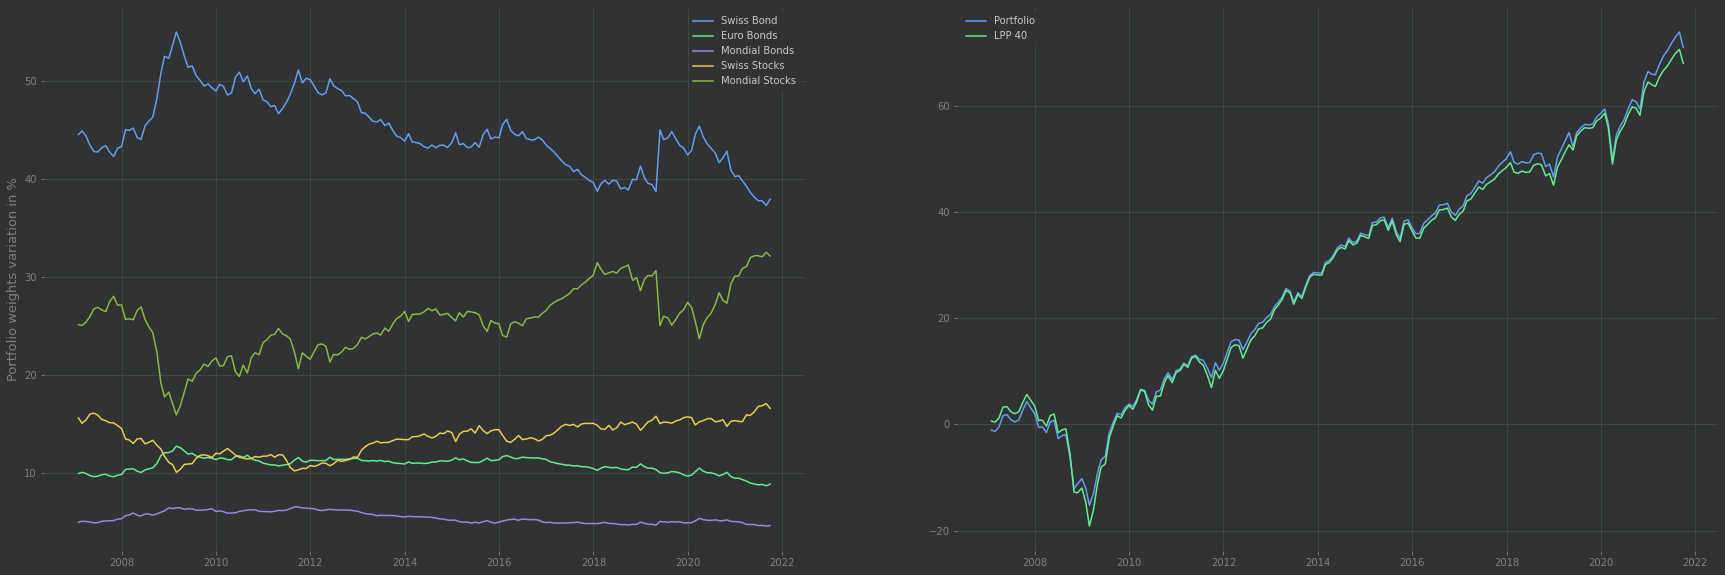

Annual Tracking Error: 1.12 % 	 Annual Cost: 0.24 % 	  Annual IR: 0.18  	  Annual Portfolio returns : 4.82 % 	  Annual Benchmark returns : 4.61


In [ ]:
# LPP-40 2000

reb = Rebalancing(lpp2000, "LPP 40", columns_2000, weight_LPP_2000_40, cost=0.0035)
reb.absolute_deviation(0.6)
reb.visualisation()

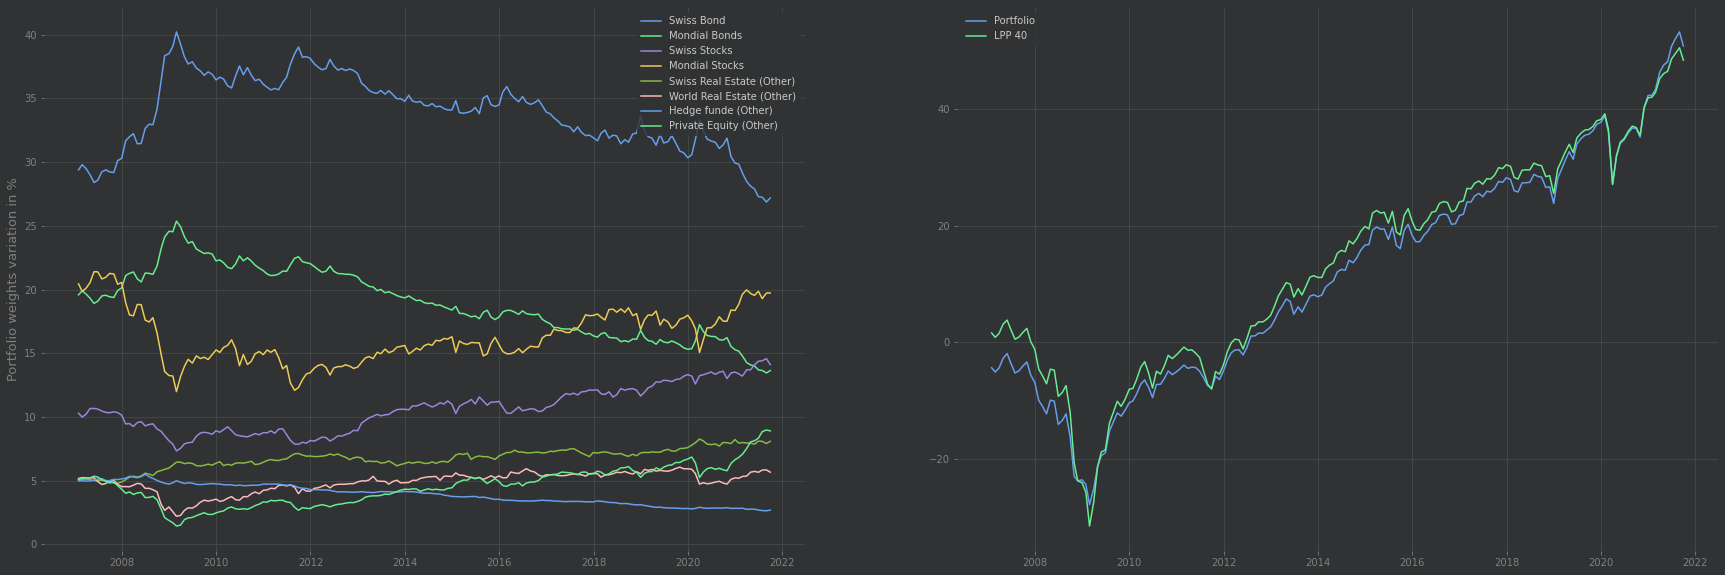

Annual Tracking Error: 2.19 % 	 Annual Cost: 0.41 % 	  Annual IR: 0.08  	  Annual Portfolio returns : 3.44 % 	  Annual Benchmark returns : 3.28


In [ ]:
# LPP-40 2005

reb = Rebalancing(lpp2005, "LPP 40", columns_2005, weight_LPP_2005_40, cost=0.0075)
reb.absolute_deviation(0.6)
reb.visualisation()

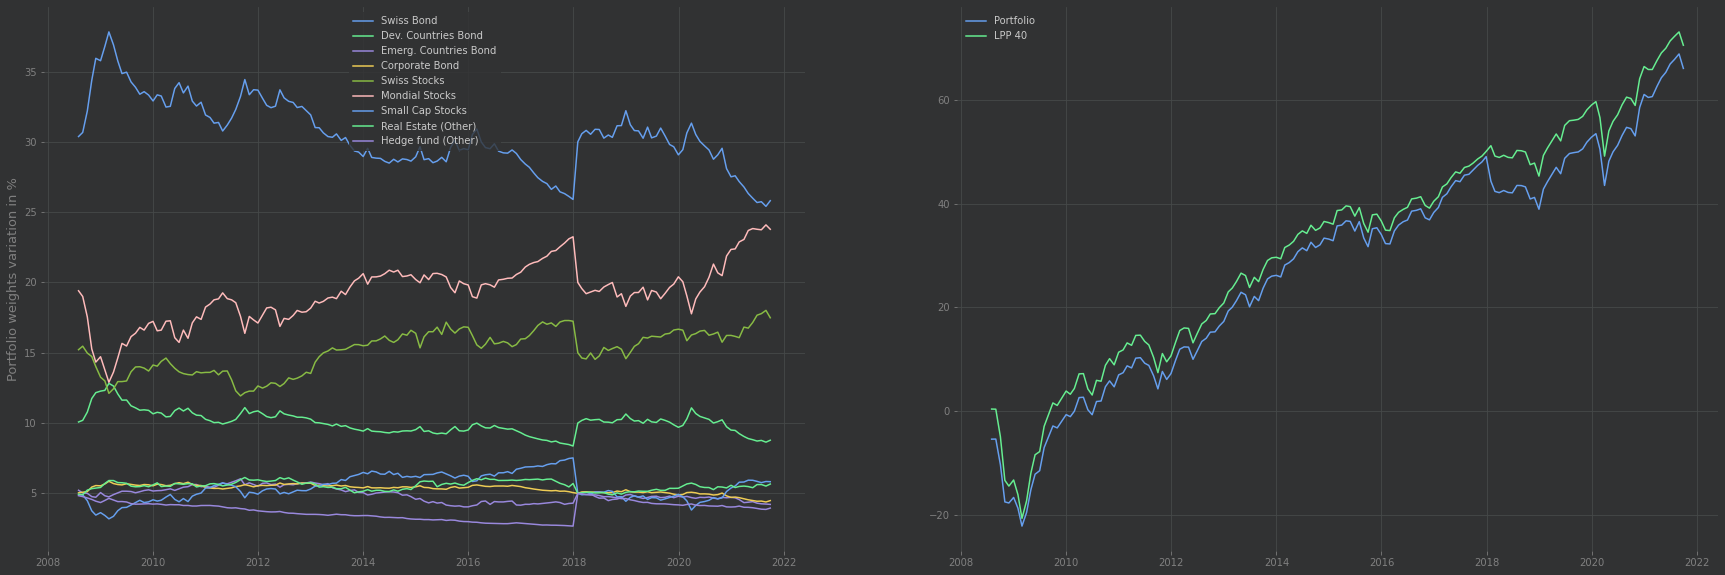

Annual Tracking Error: 2.41 % 	 Annual Cost: 0.88 % 	  Annual IR: -0.14  	  Annual Portfolio returns : 4.99 % 	  Annual Benchmark returns : 5.33


In [ ]:
# LPP-40 2015

reb = Rebalancing(lpp2015, "LPP 40", columns_2015, weight_LPP_2015_40, cost=0.0065)
reb.absolute_deviation(0.6)
reb.visualisation()

### Tracking error and costs deviation rebalancing for LPP-40 (2000/2005/2015)


***input parameter : 1.5%***

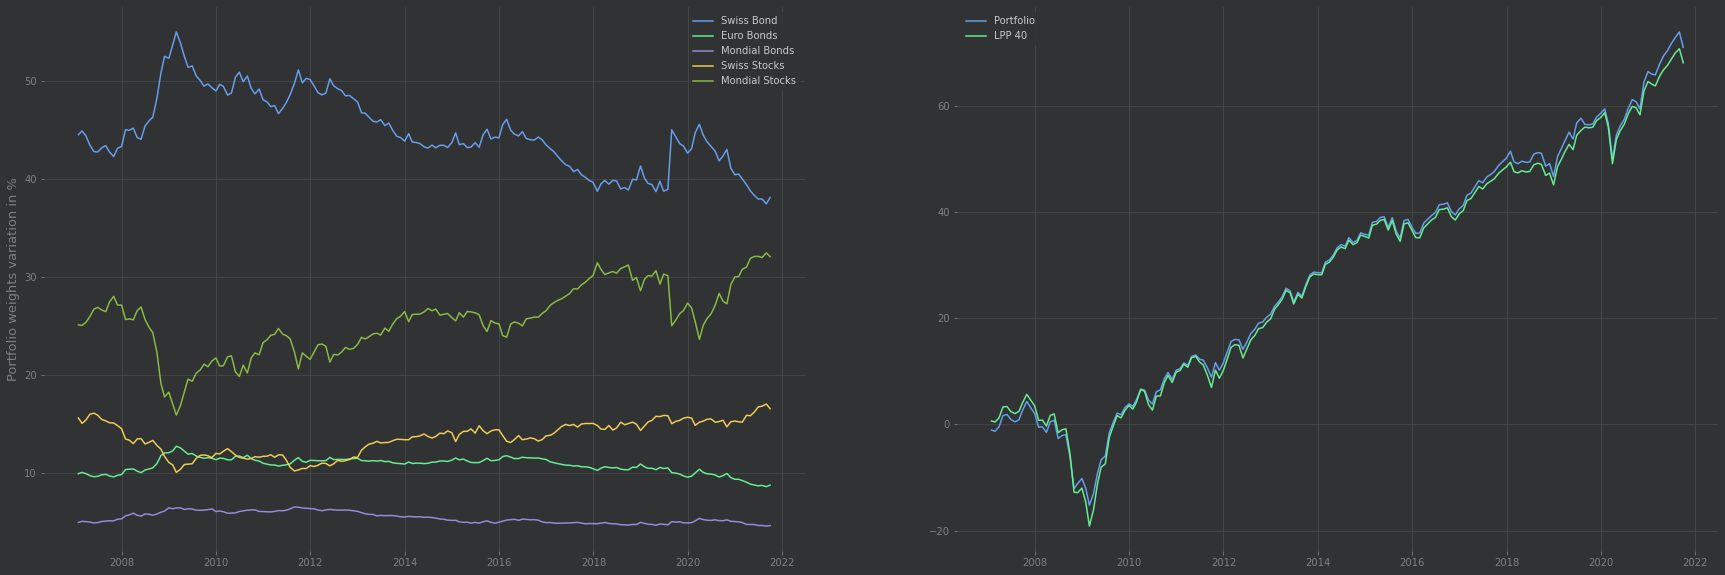

Annual Tracking Error: 1.13 % 	 Annual Cost: 0.24 % 	  Annual IR: 0.17  	  Annual Portfolio returns : 4.81 % 	  Annual Benchmark returns : 4.61


In [ ]:
# LPP-40 2000

reb = Rebalancing(lpp2000, "LPP 40", columns_2000, weight_LPP_2000_40, cost=0.0035)
reb.tracking_error_cost_deviation(0.015)
reb.visualisation()

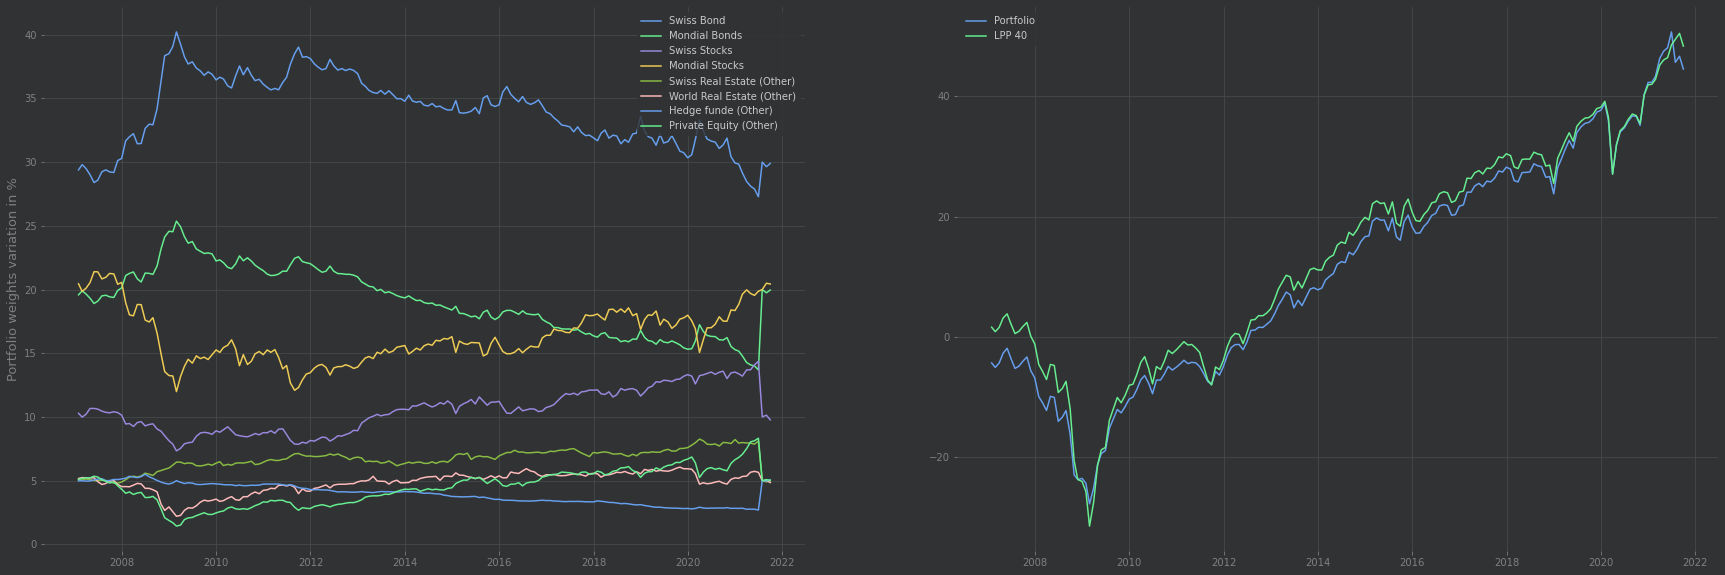

Annual Tracking Error: 2.69 % 	 Annual Cost: 0.81 % 	  Annual IR: -0.10  	  Annual Portfolio returns : 3.02 % 	  Annual Benchmark returns : 3.28


In [ ]:
# LPP-40 2005

reb = Rebalancing(lpp2005, "LPP 40", columns_2005, weight_LPP_2005_40, cost=0.0075)
reb.tracking_error_cost_deviation(0.015)
reb.visualisation()

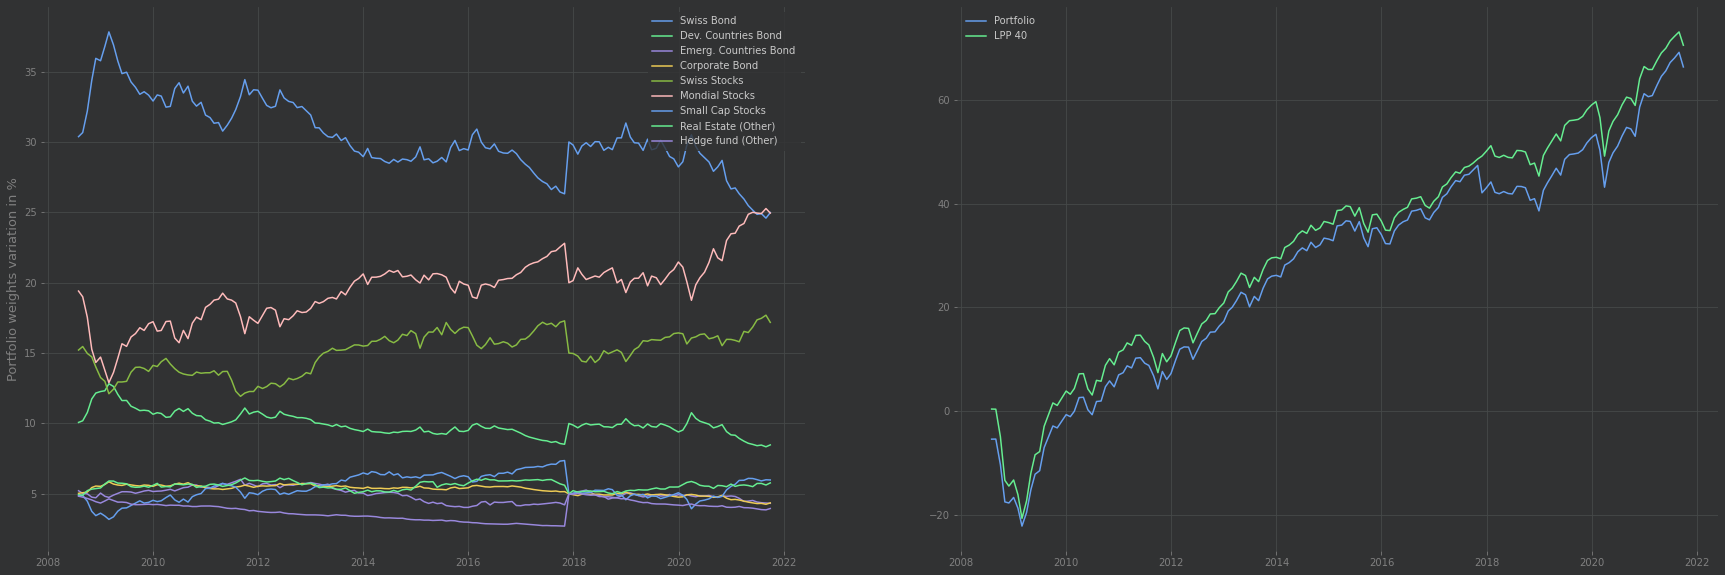

Annual Tracking Error: 2.41 % 	 Annual Cost: 0.88 % 	  Annual IR: -0.13  	  Annual Portfolio returns : 5.01 % 	  Annual Benchmark returns : 5.33


In [ ]:
# LPP-40 2015

reb = Rebalancing(lpp2015, "LPP 40", columns_2015, weight_LPP_2015_40, cost=0.0065)
reb.tracking_error_cost_deviation(0.015)
reb.visualisation()

# Sensitivity analysis

To conduct a good sensitivity analysis, we must find parameters to apply a sensitivity test on them. However, as we have seen before, the aim of optimal portfolio rebalancing is to make parameters variations to find which one is the best. So the only parameter we have to conduct this sensitivity analysis is the cost price of rebalancing but is not relevant because we based our computations on real ETFs cost, so their variations can’t be used as an entire sensitivity analysis. Because we already conducted a sort of sensitivity analysis in our work and can’t add something more relevant we will not do a sensitivity analysis.


# Robustness check: 

The aim of the robustness check consits in the verifiacation of optimal rebalancing methods parmaters on a benchmark non-studied previously. In our case we will work on 2 case study, the first one being the behavior obsevation of LPP-60 (2015) (60% stocks - 40% bonds). The second one being the behavior observation of LPP-25 (2015) (25% stocks - 75% bonds). In that way we will see if results found previously are conistent in terms of robustness.  

## Function of robustness check for optimal methods:


---



In [ ]:
# Rebalancing lists for all robustness rebalancing methods:


# LPP-25 2015 rebalancing
rebalance_list_robustness_LPP25 = ['Absolute weights deviation rebalancing LPP-25 2015(robusteness)',
                       'Tracking Error and costs deviation rebalancing LPP-25 2015(robustness)']


# LPP-60 2015 rebalancing
rebalance_list_robustness_LPP60 = ['Absolute weights deviation rebalancing LPP-60 2015(robusteness)',
                       'Tracking Error and costs deviation rebalancing LPP-60 2015(robustness)']                       

In [ ]:
def result_lpp_robustness(lpp_nb,lpp_name, columns, weight, methods_list, cost):

  # Result table columns format
  table_columns = ['Parameter', 'Annual Tracking Error','Annual Cost','Annual Information ratio', 'Portfolio annual returns', 'Benchmark annual returns','Total number of rebalancing']

  print('_'*50,methods_list[0])

  # Result Table
  a=[]
  for i in range(11):
    reb.absolute_deviation(0.1*i)
    a.append(reb.metrics())

  # DataFrame construction
  AD_rebalancing = pd.DataFrame(a, columns = table_columns)
  AD_rebalancing = AD_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #AD_rebalancing.to_excel('/content/'+methods_list[0]+'.xlsx')

  # Displaying the result table
  display(AD_rebalancing)

  print('_'*100)


  print('_'*50, methods_list[1])

  # Result Table
  a=[]
  for i in range(15):
    reb.tracking_error_cost_deviation(0.0025*i)
    a.append(reb.metrics())

  # DataFrame construction
  TEU_rebalancing = pd.DataFrame(a, columns = table_columns)
  TEU_rebalancing = TEU_rebalancing.set_index('Parameter')

  # Download the result table dataframe 
  #TEU_rebalancing.to_excel('/content/'+methods_list[1]+'.xlsx')

  # Displaying the result table
  display(TEU_rebalancing)


  print('_'*100)

## Robustness Check:


---



LPP-25 (2015)

In [ ]:
result_lpp_robustness(lpp2015, "LPP 25", columns_2015, weight_LPP_2015_25, rebalance_list_robustness_LPP25, cost=0.0065)

__________________________________________________ Absolute weights deviation rebalancing LPP-25 2015(robusteness)


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.2,35.321,-3.416,-29.637,5.327,80.0
0.1,5.0,4.415,-0.763,1.526,5.327,10.0
0.2,4.0,2.649,-0.433,3.610,5.327,6.0
0.3,2.9,1.325,-0.272,4.539,5.327,3.0
0.4,2.9,1.325,-0.222,4.678,5.327,3.0
0.5,2.4,0.883,-0.116,5.046,5.327,2.0
0.6,2.4,0.883,-0.140,4.990,5.327,2.0
0.7,2.4,0.883,-0.113,5.052,5.327,2.0
0.8,2.5,0.883,-0.088,5.110,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error and costs deviation rebalancing LPP-25 2015(robustness)


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,5.8,6.181,-0.983,-0.400,5.327,14.0
0.0025,5.0,4.415,-0.777,1.433,5.327,10.0
0.0050,3.6,2.208,-0.468,3.622,5.327,5.0
0.0075,3.3,1.766,-0.385,4.061,5.327,4.0
0.0100,2.9,1.325,-0.271,4.540,5.327,3.0
0.0125,2.4,0.883,-0.119,5.040,5.327,2.0
0.0150,2.4,0.883,-0.131,5.011,5.327,2.0
0.0175,2.4,0.883,-0.120,5.038,5.327,2.0
0.0200,2.4,0.883,-0.103,5.077,5.327,2.0


____________________________________________________________________________________________________


LPP-60 (2015)

In [ ]:
result_lpp_robustness(lpp2015, "LPP 60", columns_2015, weight_LPP_2015_60,rebalance_list_robustness_LPP60, cost=0.0065)

__________________________________________________ Absolute weights deviation rebalancing LPP-60 2015(robusteness)


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0,10.2,35.321,-3.416,-29.637,5.327,80.0
0.1,5.0,4.415,-0.763,1.526,5.327,10.0
0.2,4.0,2.649,-0.433,3.610,5.327,6.0
0.3,2.9,1.325,-0.272,4.539,5.327,3.0
0.4,2.9,1.325,-0.222,4.678,5.327,3.0
0.5,2.4,0.883,-0.116,5.046,5.327,2.0
0.6,2.4,0.883,-0.140,4.990,5.327,2.0
0.7,2.4,0.883,-0.113,5.052,5.327,2.0
0.8,2.5,0.883,-0.088,5.110,5.327,2.0


____________________________________________________________________________________________________
__________________________________________________ Tracking Error and costs deviation rebalancing LPP-60 2015(robustness)


,Annual Tracking Error,Annual Cost,Annual Information ratio,Portfolio annual returns,Benchmark annual returns,Total number of rebalancing
Parameter,,,,,,
0.0000,5.8,6.181,-0.983,-0.400,5.327,14.0
0.0025,5.0,4.415,-0.777,1.433,5.327,10.0
0.0050,3.6,2.208,-0.468,3.622,5.327,5.0
0.0075,3.3,1.766,-0.385,4.061,5.327,4.0
0.0100,2.9,1.325,-0.271,4.540,5.327,3.0
0.0125,2.4,0.883,-0.119,5.040,5.327,2.0
0.0150,2.4,0.883,-0.131,5.011,5.327,2.0
0.0175,2.4,0.883,-0.120,5.038,5.327,2.0
0.0200,2.4,0.883,-0.103,5.077,5.327,2.0


____________________________________________________________________________________________________


## Visualization of robustness check:


---


Absolute weights deviation 

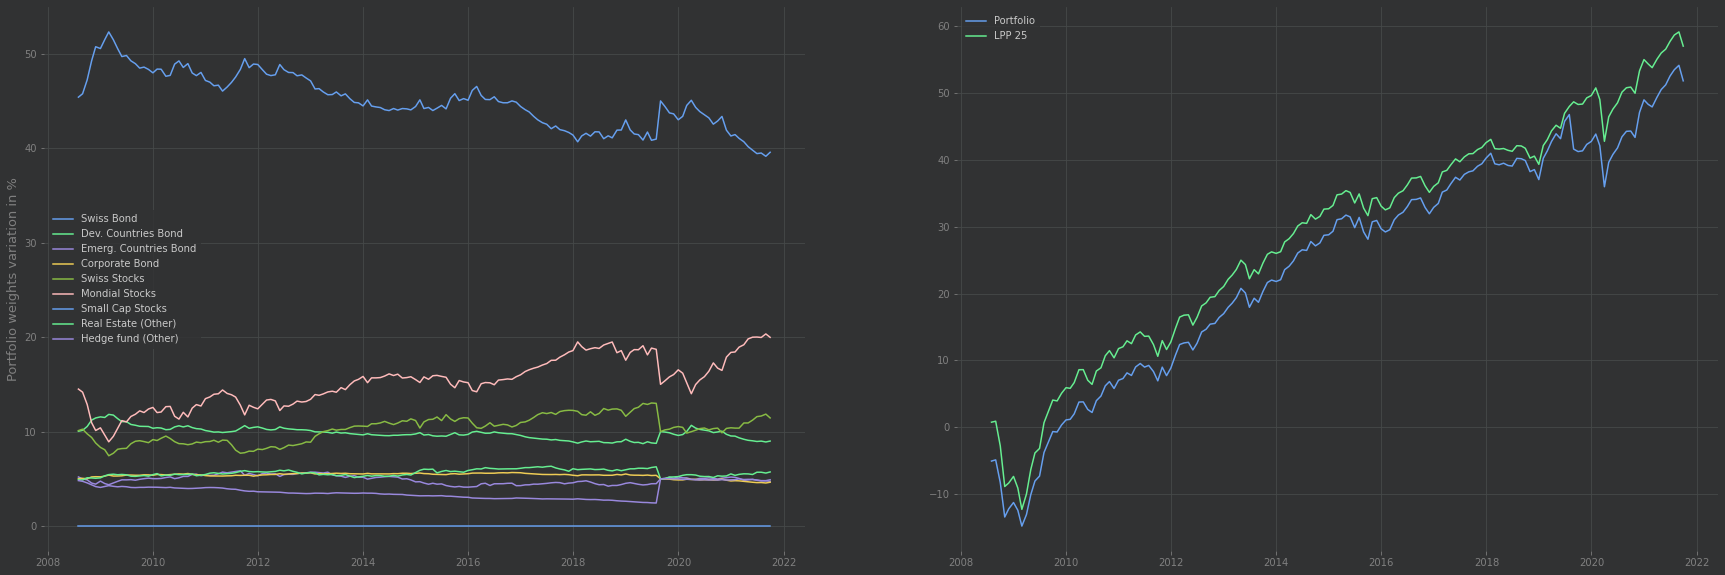

Annual Tracking Error: 2.36 % 	 Annual Cost: 0.88 % 	  Annual IR: -0.17  	  Annual Portfolio returns : 3.91 % 	  Annual Benchmark returns : 4.30


In [ ]:
# LPP-25 2015

reb = Rebalancing(lpp2015, "LPP 25", columns_2015, weight_LPP_2015_25, cost=0.0065)
reb.absolute_deviation(0.6)
reb.visualisation()

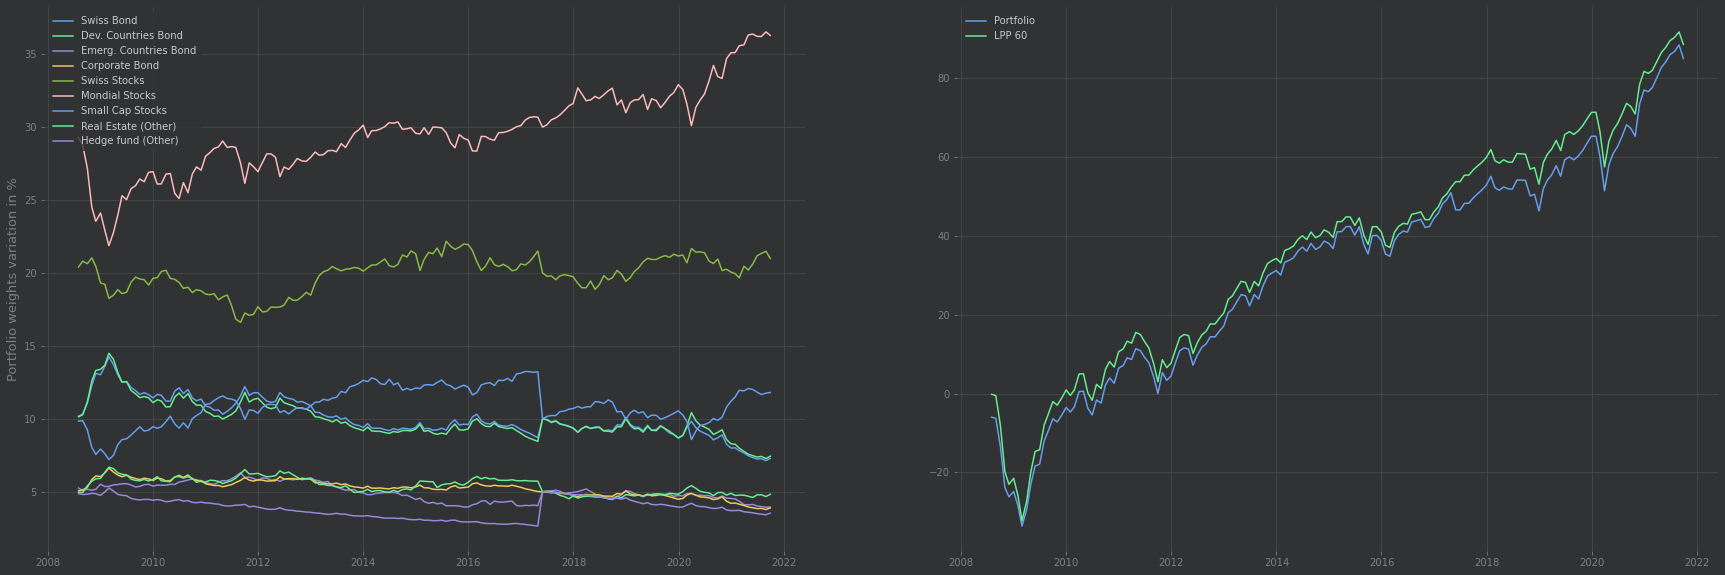

Annual Tracking Error: 2.42 % 	 Annual Cost: 0.88 % 	  Annual IR: -0.11  	  Annual Portfolio returns : 6.41 % 	  Annual Benchmark returns : 6.68


In [ ]:
# LPP-60 2015

reb = Rebalancing(lpp2015, "LPP 60", columns_2015, weight_LPP_2015_60, cost=0.0065)
reb.absolute_deviation(0.6)
reb.visualisation()

Tracking error and cost deviation

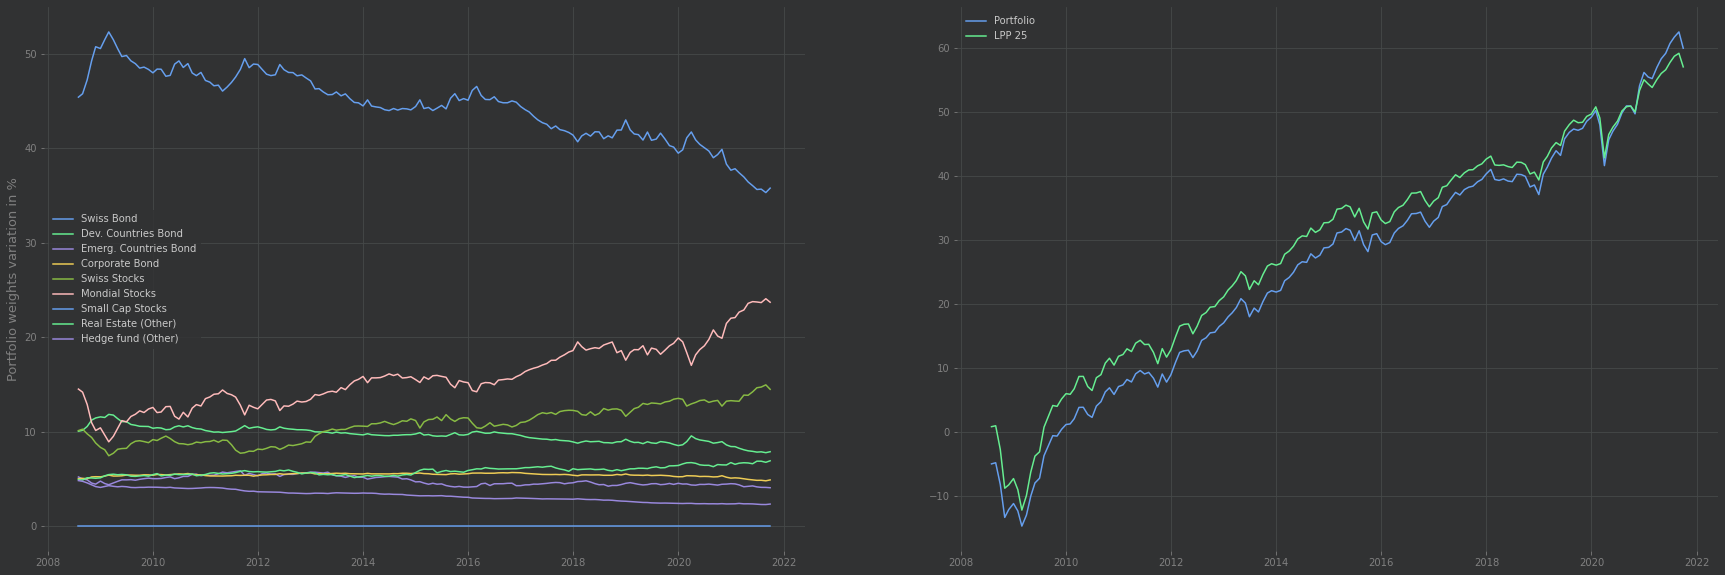

Annual Tracking Error: 1.80 % 	 Annual Cost: 0.44 % 	  Annual IR: 0.12  	  Annual Portfolio returns : 4.52 % 	  Annual Benchmark returns : 4.30


In [ ]:
# LPP-25 2015

reb = Rebalancing(lpp2015, "LPP 25", columns_2015, weight_LPP_2015_25, cost=0.0065)
reb.tracking_error_cost_deviation(0.6)
reb.visualisation()

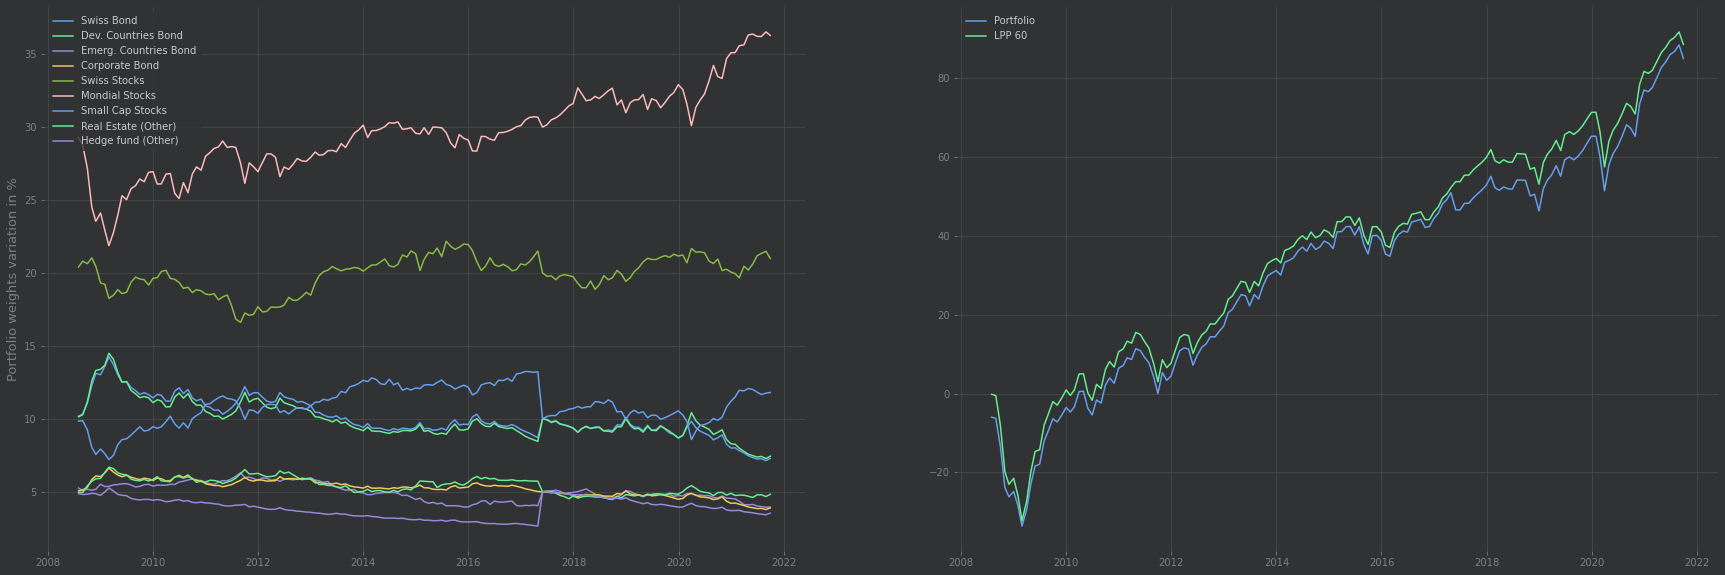

Annual Tracking Error: 2.42 % 	 Annual Cost: 0.88 % 	  Annual IR: -0.11  	  Annual Portfolio returns : 6.41 % 	  Annual Benchmark returns : 6.68


In [ ]:
# LPP-60 2015

reb = Rebalancing(lpp2015, "LPP 60", columns_2015, weight_LPP_2015_60, cost=0.0065)
reb.absolute_deviation(0.6)
reb.visualisation()

# **GUI - Webapp Dashboard access**


---

>All results presented before can be seen in a more graphical way by using the webapp Dashboard provided additionally to this work. Obviously this Dashboard take all portfolios studied before and let you the opportunity to test these methods with parameters you want. When portfolio methods and the value you want for the rebalancing  are specified, you just need to wait few seconds of server connection before the results presentation. If you run the webapp on google chrome, this updating time can be seen on the page tab. 

>A dashboard documentation can be reached with the extra-link specified on the "Value for rebalancing" section. This link will lead you to the webapp working documentation hosted on GitHub. It include a guidance for ideal value for each rebalancing methods. 


## Dashboard interface link:

> **https://optimalrebalance.pythonanywhere.com/** 



---

>The webapp includes a lot of elements seen in this notebook but also cover a huge part considered by us "out of context". Indeed this webapp has required several "html" components made accessible with dash libraries, but stay complicated if totally unknown. So, we will let you check how you can easily locally deploy the webapp on your computer by using the following link below. It will bring you to the GitHub where all required elements to deploy the webapp are mentionned and easy to use locally. Concerning internet deployment, we have used pythonanywhere.com that is a free tool to host a python website, this required some small computational manipulations that we will not provide to you.      


## Github link to source code:
> **https://github.com/FlorentFischer/OptimalRebalancingInterface.git** 